# Asking Basic Questions

In [45]:
import pandas as pd

In [46]:
df = pd.read_csv('Titanic-Dataset.csv')

## 1. How big is the data?

In [47]:
df.shape

(891, 12)

## 2. How does the data look?

In [48]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
# To display 5 random samples from the data rather than the top 5 like in head
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.525,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.000,A23,S
718,719,0,3,"McEvoy, Mr. Michael",male,NaN,0,0,36568,15.500,NaN,Q
161,162,1,2,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Mi...",female,40.0,0,0,C.A. 33595,15.750,NaN,S
693,694,0,3,"Saad, Mr. Khalil",male,25.0,0,0,2672,7.225,NaN,C


## 3. What is the data type of the columns?

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [86]:
print(df['Age'].min())
print(df['Age'].max())
print(df['Age'].mean())

0.42
80.0
29.69911764705882


## 4. Are there any missing values? 

In [51]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 5. How does the data look mathematically?

In [52]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 6. Are there duplicate values?

In [53]:
df.duplicated().sum()

0

## 7. How is the correlation between columns?

In [54]:
# Select only numerical columns
# Approach 1
numericalColumns = []
for col in df.columns:
    if df[col].dtype != object:
        numericalColumns.append(col)
numericalDf = pd.DataFrame(df[numericalColumns])


In [55]:
# Approach 2
numericalDf = df.select_dtypes(include=["number"])

In [56]:
# Are the columns dependent on each other - pearson correlation coefficient
# Positive correlation - As one variable increases, the other variable also increases, and as one decreases, the other also decreases. 
# Negative correlation - As one variable increases, the other variable decreases, and vice versa. 
numericalDf.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


# EDA

## Univariate Analysis

### 1. Categorical Columns

In [57]:
import seaborn as sns

#### a. Countplot
Gives frequency count for the categorical column

<Axes: xlabel='Survived', ylabel='count'>

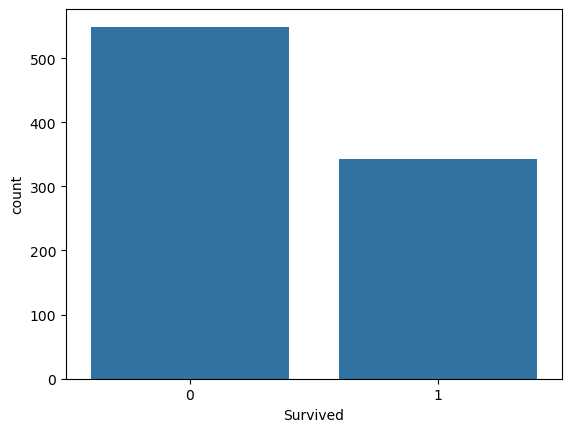

In [69]:
# 0 - Not survived
# 1 - Survived
sns.countplot(x=df['Survived'])

# Approach 2
# df['Survived'].value_counts().plot(kind = 'bar')

<Axes: xlabel='Pclass', ylabel='count'>

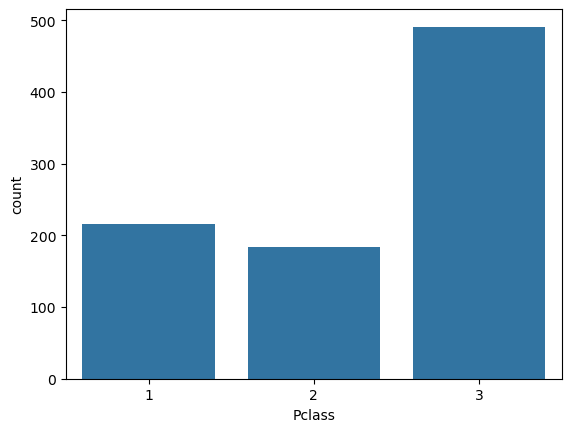

In [59]:
# Class 3 people were more on titanic
sns.countplot(x = df['Pclass'])

<Axes: xlabel='Sex', ylabel='count'>

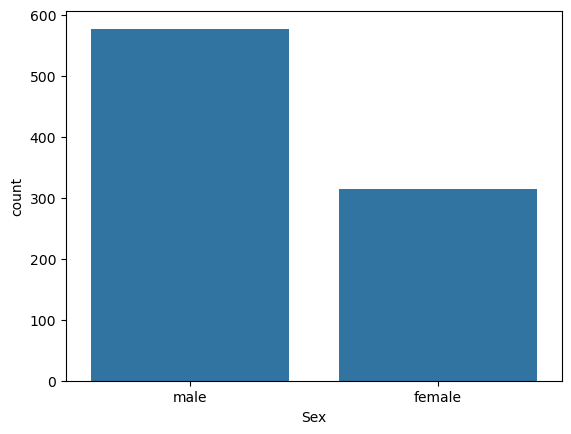

In [61]:
# Males were more than females
sns.countplot(x = df['Sex'])

<Axes: xlabel='Embarked', ylabel='count'>

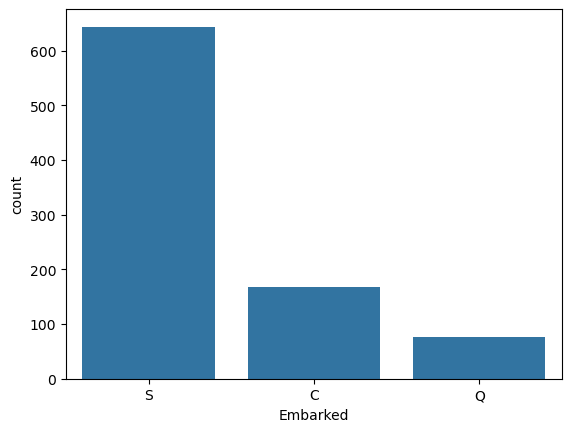

In [ ]:
# Maximum people boarded from southampton and the least boarded from Queenstown.
sns.countplot(x = df['Embarked'])

#### b. Pie Chart
Gives the frequency count in terms of percentages

<Axes: ylabel='count'>

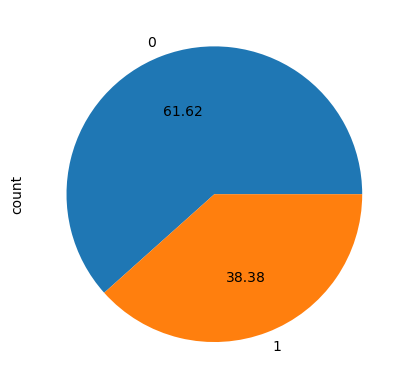

In [71]:
df['Survived'].value_counts().plot(kind = 'pie', autopct='%.2f')

<Axes: ylabel='count'>

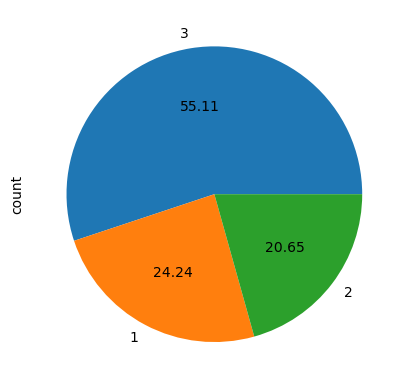

In [72]:
df['Pclass'].value_counts().plot(kind = 'pie', autopct='%.2f')

### 2. Numerical Data

#### a. Histogram
Used to see distribution of numerical data by creating bins.

In [73]:
import matplotlib.pyplot as plt

(array([24.,  6., 14.,  3.,  7.,  8.,  6.,  3.,  7., 22., 13., 51., 40.,
        27., 46., 24., 36., 47., 27., 35., 17., 34., 29., 11., 27.,  8.,
        18.,  9., 17., 18.,  6., 17.,  6.,  9.,  7.,  2.,  7.,  4.,  7.,
         4.,  3.,  1.,  0.,  2.,  3.,  0.,  1.,  0.,  0.,  1.]),
 array([ 0.42  ,  2.0116,  3.6032,  5.1948,  6.7864,  8.378 ,  9.9696,
        11.5612, 13.1528, 14.7444, 16.336 , 17.9276, 19.5192, 21.1108,
        22.7024, 24.294 , 25.8856, 27.4772, 29.0688, 30.6604, 32.252 ,
        33.8436, 35.4352, 37.0268, 38.6184, 40.21  , 41.8016, 43.3932,
        44.9848, 46.5764, 48.168 , 49.7596, 51.3512, 52.9428, 54.5344,
        56.126 , 57.7176, 59.3092, 60.9008, 62.4924, 64.084 , 65.6756,
        67.2672, 68.8588, 70.4504, 72.042 , 73.6336, 75.2252, 76.8168,
        78.4084, 80.    ]),
 <BarContainer object of 50 artists>)

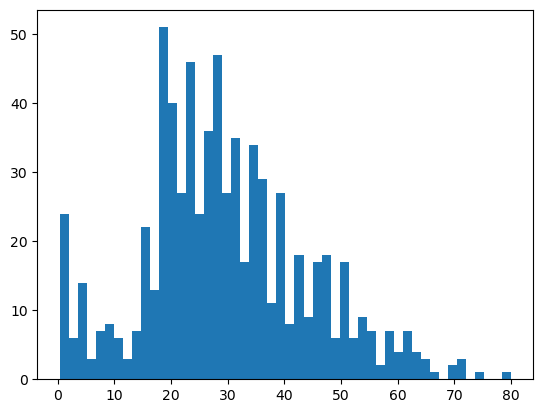

In [77]:
plt.hist(df['Age'], bins = 50)

#### b. Distplot

<Axes: xlabel='Age', ylabel='Count'>

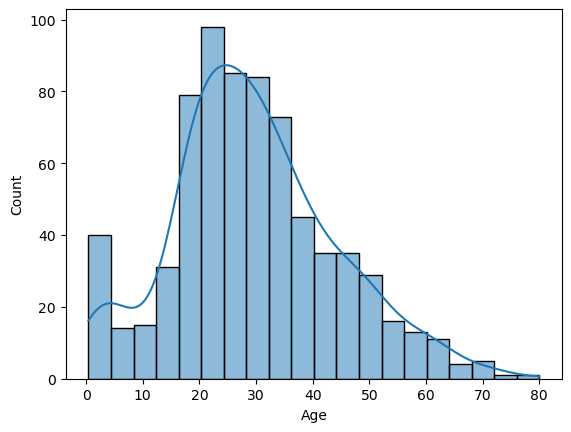

In [82]:
sns.histplot(df['Age'], kde = True)

#### c. Boxplot
Visualizes the distribution of data based on five summary statistics: minimum, first quartile, median, third quartile, and maximum.

<Axes: ylabel='Fare'>

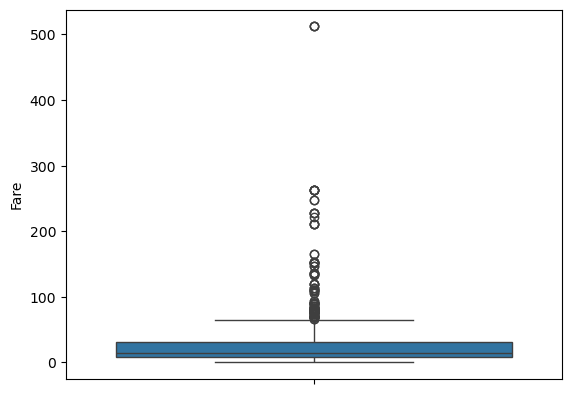

In [83]:
sns.boxplot(df['Fare'])

<Axes: ylabel='Age'>

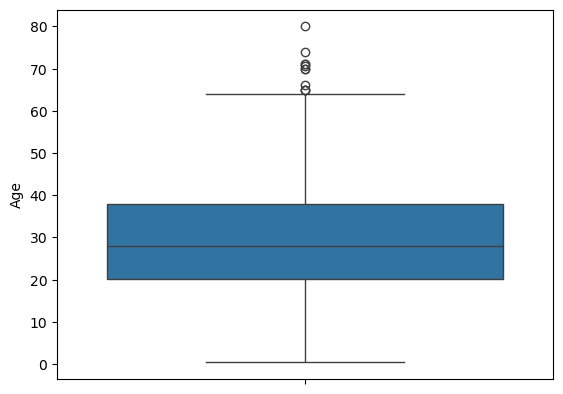

In [84]:
sns.boxplot(df['Age'])

In [85]:
print(df['Age'].min())
print(df['Age'].max())
print(df['Age'].mean())

0.42
80.0
29.69911764705882
